# Exercise for week 1 of image analysis

In [1]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom

In [7]:
im_dir = "../data/"
im_name = "metacarpals.png"

# Read the image
im_org = io.imread(im_dir + im_name)

print("Image shape: ", im_org.shape)

Image shape:  (512, 512)


In [8]:
print("Image type: ", im_org.dtype)

Image type:  uint8


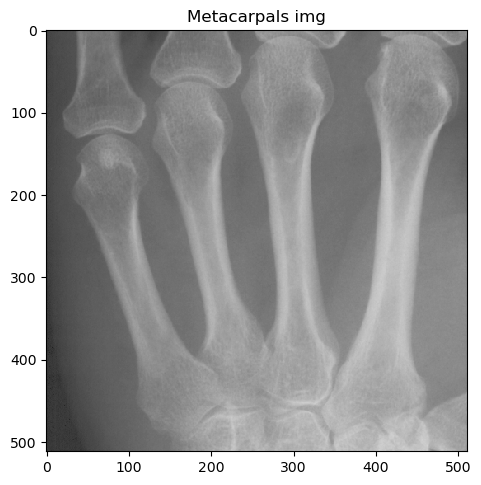

In [9]:
io.imshow(im_org)
plt.title("Metacarpals img")
io.show()

### Color-maps
Pixels with values of 20 and below will be visualized black and pixels with values of 170 and above as white and values in between as shades of gray.

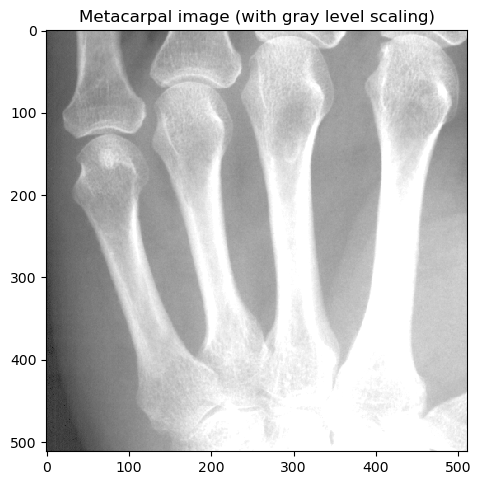

In [10]:
io.imshow(im_org, vmin=20, vmax=170)
plt.title('Metacarpal image (with gray level scaling)')
io.show()

Exercise 7: Try to find a way to automatically scale the visualization, so the pixel with the lowest value in the image is shown as black and the pixel with the highest value in the image is shown as white.

In [ ]:
min_val = np.min(im_org)

In [17]:
io.imshow(im_org, vmin=np.min(im_org), vmax=np.max(im_org))
plt.title('Metacarpal image (with gray auto level scaling)')
#Add figure text to write that teh image has been scaled automatically and list the min and max values
#add a bit of padding from the text to the image and reduce the font size
plt.figtext(0.5, 0.01, 'Image has been scaled automatically. Min value: ' + str(min_val) + ' Max value: ' + str(np.max(im_org)), wrap=True, horizontalalignment='center', fontsize=8)
io.show()

#### Image histograms for analysis
Ravel returns a flattened 1D array, in thsi case flattening the 2D image array into a single dimensional array

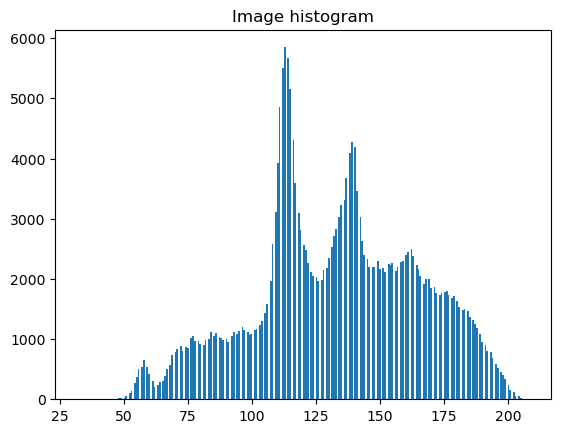

In [18]:
plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram')
io.show()

Exercise 9: Use the histogram function to find the most common range of intensities?

In [49]:
#Save the histogram values to h1 force binning to start from 0 and end at 255
#if this is not done the histogram might be shifted and the intution between indexes and values might be lost
h1 = np.histogram(im_org.ravel(), bins=256, range=(0, 255))

Most frequent value in the histogram:  113
Number of count in the most frequent bucket in the histogram:  5848
Bin edges of the most frequent value in the histogram:  112.55859375 to  113.55859375
Index of the most frequent value in the histogram:  113


Text(0.5, 1.0, 'Image histogram with most frequent value highlighted')

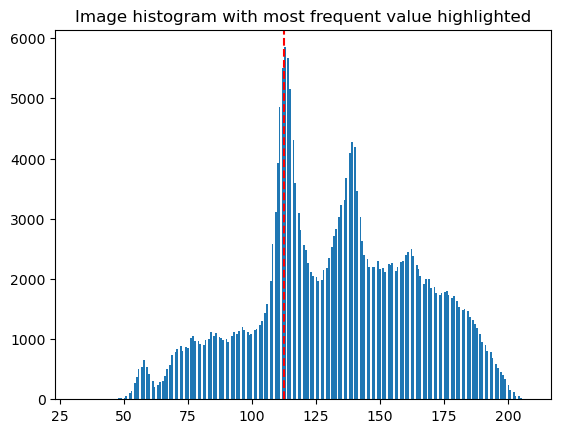

In [52]:
max_val = np.argmax(h1[0])
print("Most frequent value in the histogram: ", max_val)
#find the count of the most frequent value in the histogram
max_count = np.max(h1[0])
print("Number of count in the most frequent bucket in the histogram: ", max_count)
#find the value of the bin that contains the most frequent value
max_bin_val = h1[1][max_val]
print("Bin edges of the most frequent value in the histogram: ", max_bin_val, "to ", max_bin_val+1)
#find the index of the bin that contains the most frequent value
max_bin_idx = np.where(h1[1] == max_bin_val)
print("Index of the most frequent value in the histogram: ", max_bin_idx[0][0])
#plot the histogram with the most frequent value highlighted
plt.hist(im_org.ravel(), bins=256)
plt.axvline(x=max_bin_val, color='r', linestyle='--')
plt.title('Image histogram with most frequent value highlighted')


### Pixel values and image coordiante systems
Exercise 10: What is the pixel value at (r, c) = (110, 90) ?

In [54]:
r = 110
c = 90
im_val = im_org[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

The pixel value at (r,c) = (110, 90) is: 120


Exercise 11: What does this operation do?

im_org[:30] = 0

It slices the forst 30 rows of the array and set the values to 0 (black)

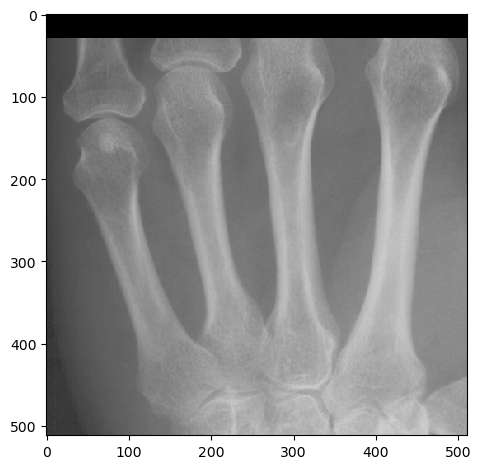

In [71]:
im_org = io.imread(im_dir + im_name)
im_org[:30] = 0
io.imshow(im_org)
io.show()

A similar operation can be used on the columns, second axis, or a combination of the two by the following:

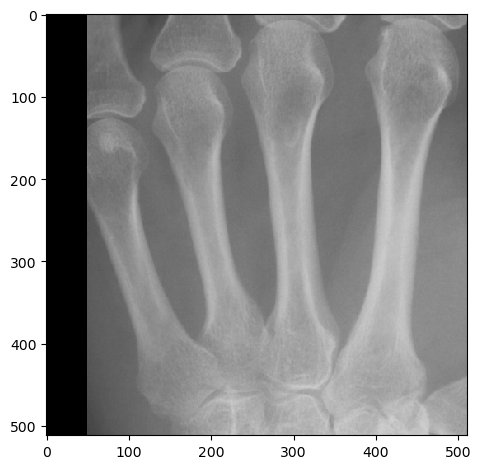

In [72]:
im_org = io.imread(im_dir + im_name)
im_org[:,:50] = 0
io.imshow(im_org)
io.show()

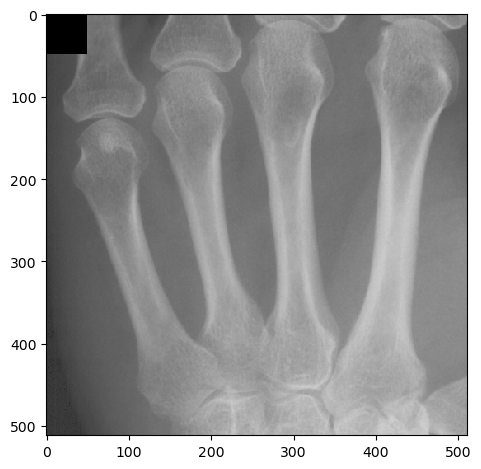

In [73]:
im_org = io.imread(im_dir + im_name)
im_org[:50,:50] = 0
io.imshow(im_org)
io.show()

Masking
Exercise 12: Where are the values 1 and where are they 0?

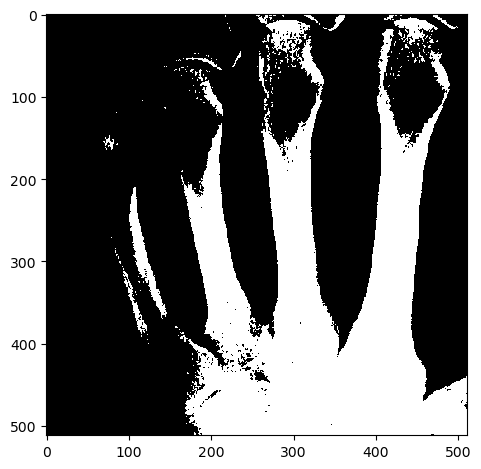

In [88]:
im_org = io.imread(im_dir + im_name)
mask = im_org > 150
io.imshow(mask)
io.show()
#In this code any pixel with a value greater than 150 is set to 1 and all other pixels are set to 0

In [89]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

Exercise 13: What does this piece of code do?

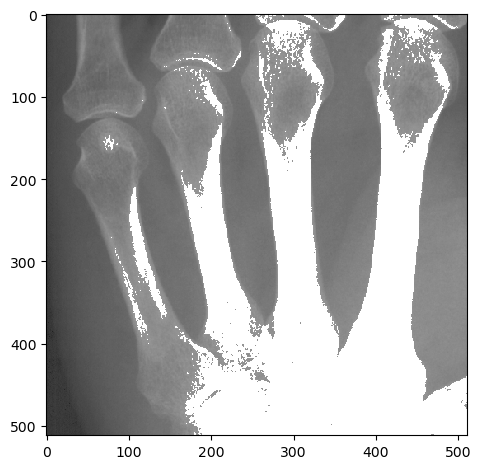

In [93]:
#For all values that are 1 (true, default) in the mask (greater than 150) set the value to 255 (white)
#as a result the image is brightened in the area where the mask is true
im_org = io.imread(im_dir + im_name)
im_org[mask] = 255
#Equavalent to: im_org[mask == True] = 255
io.imshow(im_org)
io.show()

## Color images
Exercise 14: Read the image and print the image dimensions and its pixel type. How many rows and columns do the image have?

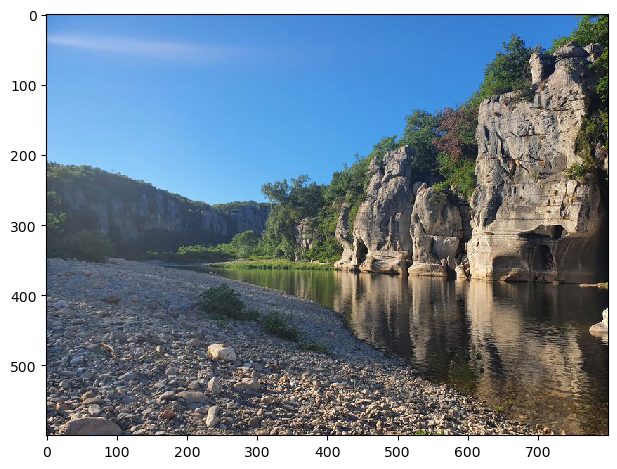

In [95]:
im_name = 'ardeche.jpg'
im_dir = '../data/'
im_org = io.imread(im_dir + im_name)
io.imshow(im_org)

In [99]:
print('Shape of the image: ', im_org.shape)
print('Type of the image: ', im_org.dtype)

Shape of the image:  (600, 800, 3)
Type of the image:  uint8


Exercise 15: What are the (R, G, B) pixel values at (r, c) = (110, 90)?

In [105]:
im_val = im_org[110,90]
print(f"The pixel value at (r,c) = ({110}, {90}) is: {im_val}")

The pixel value at (r,c) = (110, 90) is: [119 178 238]


Exercise 16: Try to use NumPy slicing to color the upper half of the photo green.

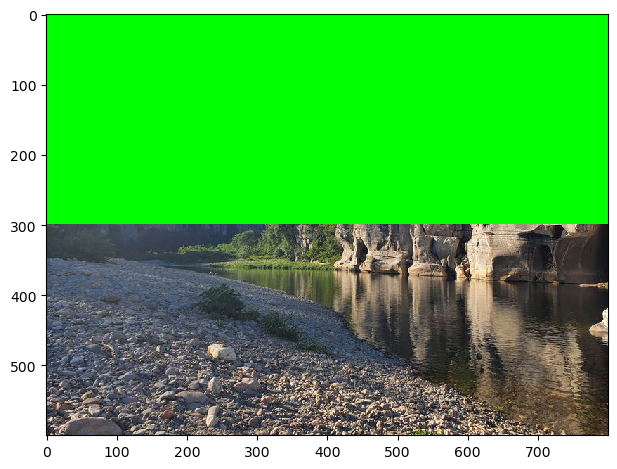

In [112]:
im_org = io.imread(im_dir + im_name)
rows = im_org.shape[0]
r2 = int(rows/2)
im_org[:r2]=[0,255,0]
io.imshow(im_org)

## Working with your own image

Shape of the image:  (3024, 4032, 3)
Type of the image:  uint8


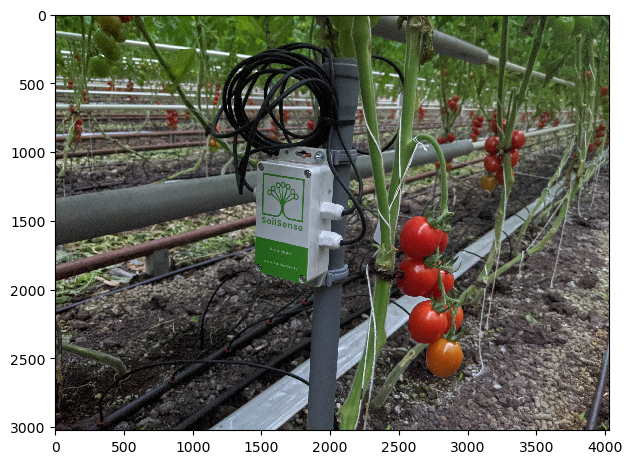

In [138]:
im_name = 'pxl_soilsense.jpg'
im_dir = '../data/'
im_org = io.imread(im_dir + im_name)
io.imshow(im_org)
print('Shape of the image: ', im_org.shape)
print('Type of the image: ', im_org.dtype)

In [114]:
image_rescaled = rescale(im_org, 0.25, anti_aliasing=True,
                         channel_axis=2)

Shape of the image:  (756, 1008, 3)
Type of the image:  float64


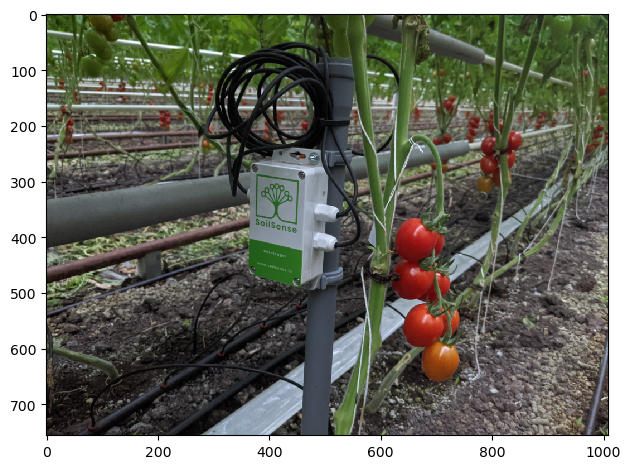

In [116]:
io.imshow(image_rescaled)
print('Shape of the image: ', image_rescaled.shape)
print('Type of the image: ', image_rescaled.dtype)

 The rescale function has this side effect, that it changes the type of the pixel values.
 
Exercise 18: What is the type of the pixels after rescaling? Try to show the image and inspect the pixel values. Are they still in the range of [0, 255]?

In [119]:
image_rescaled[0][0]

array([0.28016246, 0.34544621, 0.12137075])

No, the values are now converted into floats valued from 0 - 1

Shape of the image:  (756, 504, 3)
Type of the image:  float64


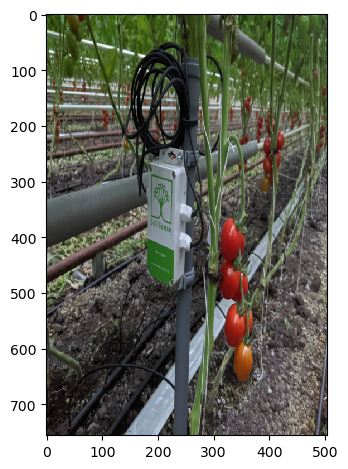

In [123]:
image_resized = resize(im_org, (im_org.shape[0] // 4,
                       im_org.shape[1] // 8),
                       anti_aliasing=True)

io.imshow(image_resized)
print('Shape of the image: ', image_resized.shape)
print('Type of the image: ', image_resized.dtype)

Exercise 19: Try to find a way to automatically scale your image so the resulting width (number of columns) is always equal to 400, no matter the size of the input image?

Scale ratio:  0.0992063492063492
Shape of the image:  (300, 400, 3)
Type of the image:  float64


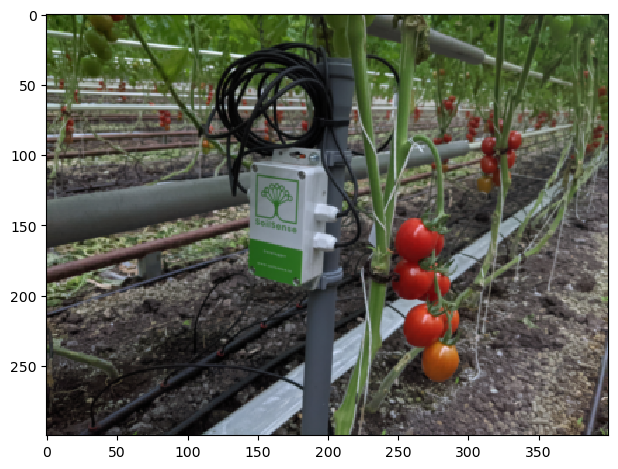

In [129]:
image_scale_ratio = 400/im_org.shape[1]
print('Scale ratio: ', image_scale_ratio)
image_resized = rescale(im_org, image_scale_ratio, anti_aliasing=True, channel_axis=2)
io.imshow(image_resized)
print('Shape of the image: ', image_resized.shape)
print('Type of the image: ', image_resized.dtype)

Scale ratio:  0.0992063492063492
Shape of the image:  (300, 400, 3)
Type of the image:  float64


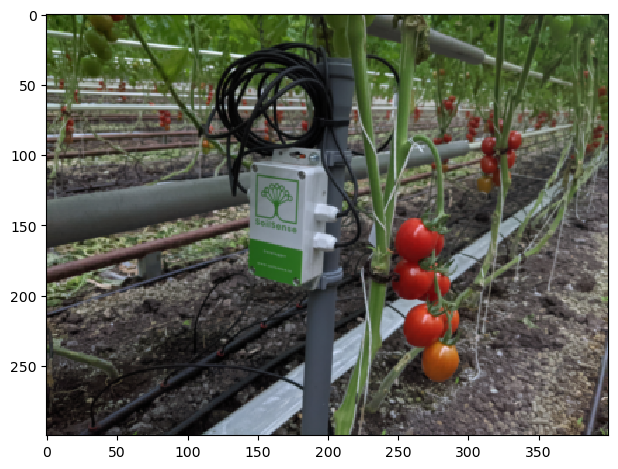

In [128]:
image_scale_ratio = 400/im_org.shape[1]
print('Scale ratio: ', image_scale_ratio)
image_resized = rescale(im_org, image_scale_ratio, anti_aliasing=True, channel_axis=2)
io.imshow(image_resized)
print('Shape of the image: ', image_resized.shape)
print('Type of the image: ', image_resized.dtype)

Exercise 19: Compute and show the histogram of you own image.

To be able to work with the image, it can be transformed into a gray-level image. We are forcing the pixel type back into unsigned bytes using the img_as_ubyte function, since the rgb2gray functions returns the pixel values as floating point numbers.

In [130]:
im_gray = color.rgb2gray(im_org)
im_byte = img_as_ubyte(im_gray)

Text(0.5, 1.0, 'Image histogram')

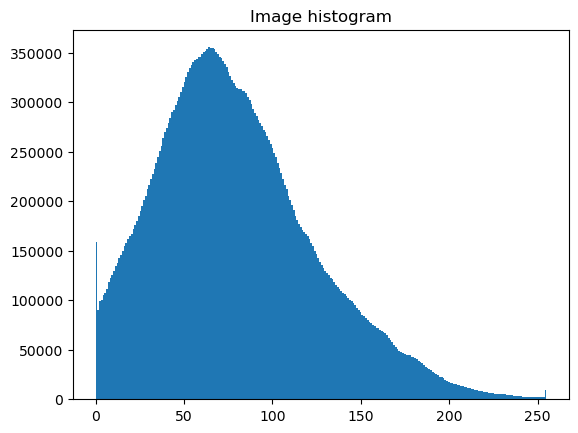

In [139]:
#Plot the histogram of the image
#np.hist(im_byte.ravel(), bins=256, range=(0, 255))
plt.hist(im_org.ravel(), bins=256, range=(0, 255))
plt.title('Image histogram')

Shape of the image:  (3024, 4032, 3)
Type of the image:  uint8


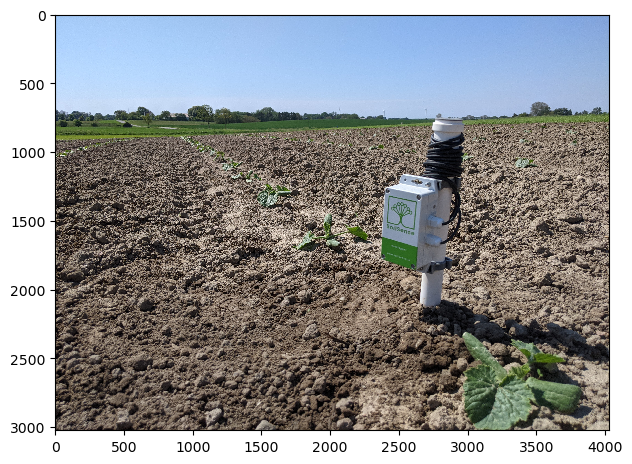

In [141]:
im_name = 'pxl_soilsense_bright.jpg'
im_dir = '../data/'
im_org = io.imread(im_dir + im_name)
io.imshow(im_org)
print('Shape of the image: ', im_org.shape)
print('Type of the image: ', im_org.dtype)

Exercise 20: Take an image that is very dark and another very light image. Compute and visualise the histograms for the two images. Explain the difference between the two.

A more bright image, as seen below, will have a histogram with more more high value buckets. The below is an evenly distributed image, but still more bright than the above. 

In [143]:
im_gray = color.rgb2gray(im_org)
im_byte = img_as_ubyte(im_gray)
#Plot the histogram of the image
#np.hist(im_byte.ravel(), bins=256, range=(0, 255))
plt.hist(im_org.ravel(), bins=256, range=(0, 255))
plt.title('Image histogram of more bright image')

Text(0.5, 1.0, 'Image histogram of more bright image')

Exercise 21: Take an image with a bright object on a dark background. Compute and visualise the histograms for the image. Can you recognise the object and the background in the histogram?

Yes, if I know that the object is bright and background dark, I would be able to identify the pixels that primarily make up the object.

In [145]:
im_name = 'datalogger.png'
im_dir = '../data/'
im_org = io.imread(im_dir + im_name)
io.imshow(im_org)
print('Shape of the image: ', im_org.shape)
print('Type of the image: ', im_org.dtype)

Shape of the image:  (1315, 1996, 3)
Type of the image:  uint8


In [146]:
im_gray = color.rgb2gray(im_org)
im_byte = img_as_ubyte(im_gray)
#Plot the histogram of the image
#np.hist(im_byte.ravel(), bins=256, range=(0, 255))
plt.hist(im_org.ravel(), bins=256, range=(0, 255))
plt.title('Image histogram of more bright image')

Text(0.5, 1.0, 'Image histogram of more bright image')

In this case I could likely remove part of the background with simple filtering:

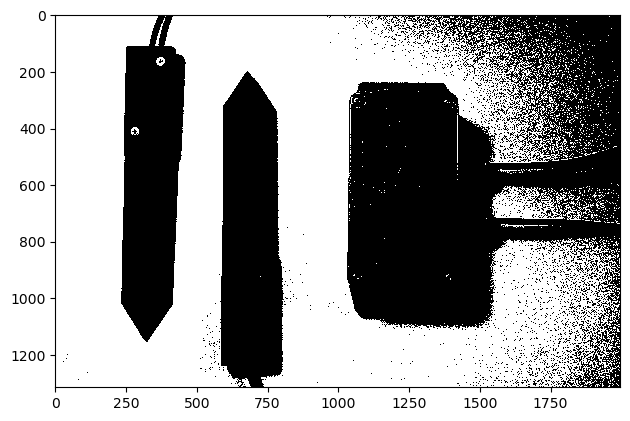

In [163]:
mask = im_byte > 230
io.imshow(mask)

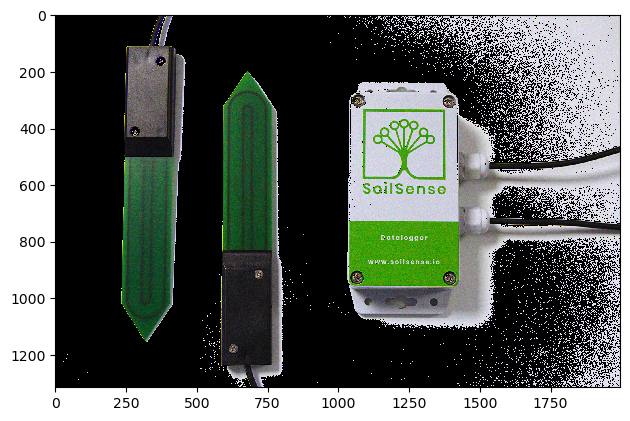

In [165]:
#For all values that are true in the mask, set the value to 255 (white)
#Keep all values that are false in the mask
#in order to remove the background
im_org = io.imread(im_dir + im_name)

#For visual purpose, set them to 0
im_org[mask] = 0
io.imshow(im_org)
io.show()

### Simple image manipulations
Exercise 24: Start by reading and showing the DTUSign1.jpg image.

Shape of the image:  (3024, 4032, 3)
Type of the image:  uint8


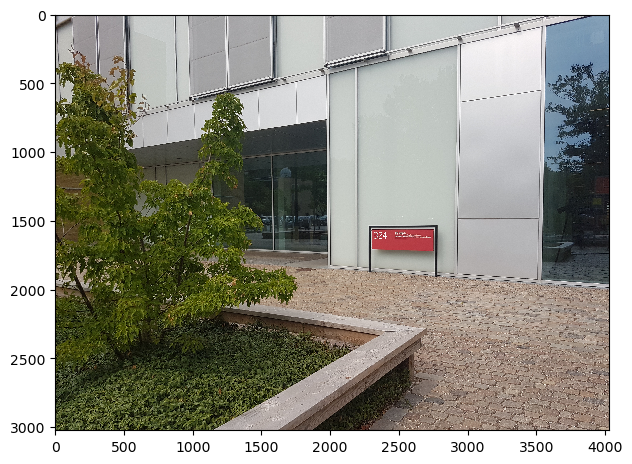

In [168]:
im_name = 'DTUSign1.jpg'
im_dir = '../data/'
im_org = io.imread(im_dir + im_name)
io.imshow(im_org)
print('Shape of the image: ', im_org.shape)
print('Type of the image: ', im_org.dtype)

In [169]:
#Add a black box to the image and save it in the data folder as a png
im_org[500:1000, 800:1500, :] = 0
io.imsave(im_dir + 'DTUSign1_blackbox.png', im_org)

Exercise 26: Try to create a blue rectangle around the DTU Compute sign and save the resulting image.

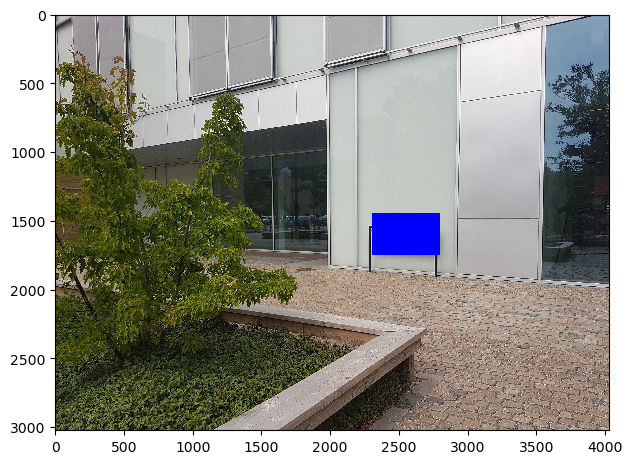

In [173]:
im_org = io.imread(im_dir + im_name)
#Add a blue rectangle to the image and save it in the data folder as a jpg
im_org[1450:1750, 2300:2800, :] = [0, 0, 255]
io.imshow(im_org)
io.imsave(im_dir + 'DTUSign1_bluebox.jpg', im_org)

Exercise 27: Try to automatically create an image based on metacarpals.png where the bones are colored blue. You should use color.gray2rgb and pixel masks.

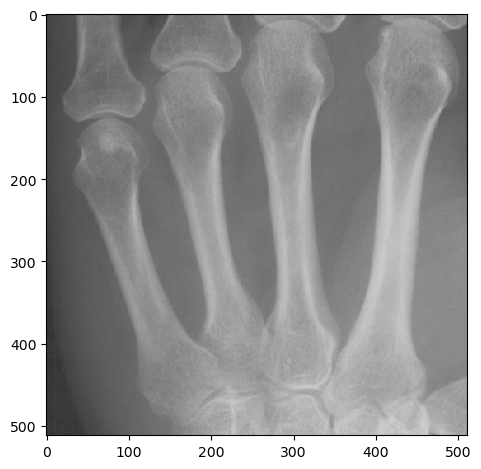

In [174]:
im_name = 'metacarpals.png'
dir_name = '../data/'
im_bone = io.imread(dir_name + im_name)
io.imshow(im_bone)

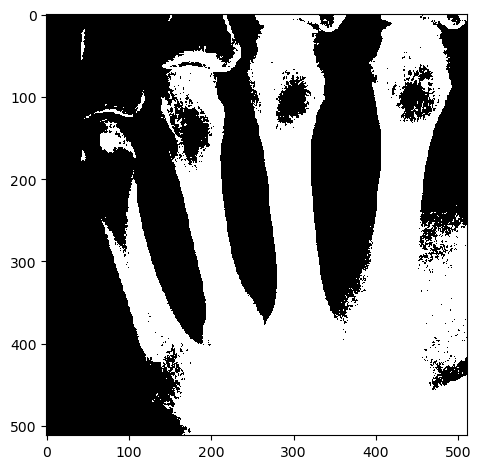

In [184]:
#Create filter for bones based on the BW image
mask = im_bone > 135
io.imshow(mask)

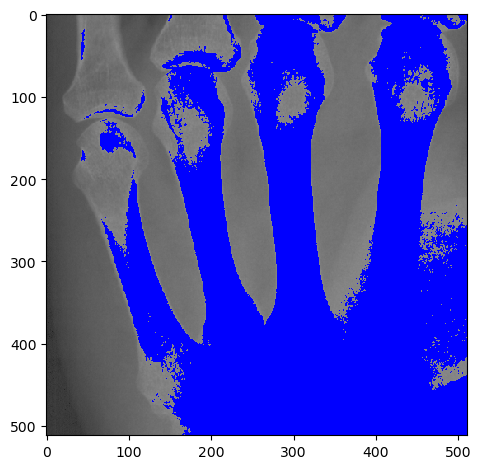

In [185]:
#Convert the initial bone image to RGB
im_bone_rgb = color.gray2rgb(im_bone)
#and set all pixels that are not bones according to the filter, to blue
im_bone_rgb[mask] = [0, 0, 255]
io.imshow(im_bone_rgb)